# Individual NN Classification Assignment (Spring 2024)
**Dr. Dave Wanik - University of Connecticut**

* Full Name: Adam Syed
* Student ID (7 digit number): 2735566

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

1. Read the data dictionary and description from here:

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

 Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

2. Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

3. Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

4. Make two interesting plots or tables and a description of why you made the table and what you see.

5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

7. Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.

10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

# Read Data and Import Modules
## Question 1

In [170]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [39]:
# https://drive.google.com/file/d/1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E/view?usp=sharing
!gdown --id 1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E # ID for Environmental Health data! look up!
df_CalEnviroScreen = pd.read_excel('CalEnviroScreen.xlsx')

/Users/adamyeeter/anaconda3/lib/python3.11/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_8vmQwSZ02ZOMw_IPHY5OWkwpXQLVW2E
To: /Users/adamyeeter/OPIM 5509 Deep Learning/M3 Assignment/CalEnviroScreen.xlsx
100%|██████████████████████████████████████| 6.19M/6.19M [00:00<00:00, 15.5MB/s]


In [171]:
# read data
df = pd.read_excel('CalEnviroScreen.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [172]:
df.head(10)

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,77.509665,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,96.253833,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,78.389548,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,75.136648,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,73.723504,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),...,89.148114,66.4,90.232558,11.6,67.419723,22.0,67.034780,82.361214,8.541407,94.892168
6,6077000300,2396,San Joaquin,95203,Stockton,-121.302072,37.952421,80.178935,99.924328,95-100% (highest scores),...,92.401013,76.2,97.033312,14.4,82.002792,24.3,74.727088,91.940147,9.534806,99.646866
7,6019001000,4106,Fresno,93706,Fresno,-119.804314,36.697751,80.134819,99.911716,95-100% (highest scores),...,76.576456,74.5,95.901948,20.0,95.494352,31.8,90.720995,93.793697,9.727032,99.911716
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),...,97.120384,75.7,96.643620,28.5,99.505013,31.7,90.555979,80.249569,8.322415,92.962543
9,6019000400,6343,Fresno,93721,Fresno,-119.776209,36.727656,78.529850,99.886493,95-100% (highest scores),...,71.350487,83.4,99.082338,23.5,98.273893,23.2,71.337903,83.195409,8.627918,95.711943


# Select Columns and Handle Missing Values
## Question 2

In [173]:
#selecting columns
y = df['Poverty']
X = df[['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Education', 'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl']]

In [174]:
#display missing values
missing_values = df[['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Education', 'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty']].isnull().sum()
print(missing_values)

Total Population               0
Ozone                          0
Ozone Pctl                     0
PM2.5                         19
PM2.5 Pctl                    19
Diesel PM                      0
Diesel PM Pctl                 0
Drinking Water                18
Drinking Water Pctl           18
Pesticides                     0
Pesticides Pctl                0
Tox. Release                   0
Tox. Release Pctl              0
Traffic                       56
Traffic Pctl                  56
Cleanup Sites                  0
Cleanup Sites Pctl             0
Groundwater Threats            0
Groundwater Threats Pctl       0
Haz. Waste                     0
Haz. Waste Pctl                0
Imp. Water Bodies              0
Imp. Water Bodies Pctl         0
Solid Waste                    0
Solid Waste Pctl               0
Asthma                         0
Asthma Pctl                    0
Low Birth Weight             222
Low Birth Weight Pctl        222
Cardiovascular Disease         0
Education 

In [175]:
#impute and fill using mean
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace=True)
df['PM2.5 Pctl'].fillna(df['PM2.5 Pctl'].mean(), inplace=True)
df['Drinking Water'].fillna(df['Drinking Water'].mean(), inplace=True)
df['Drinking Water Pctl'].fillna(df['Drinking Water Pctl'].mean(), inplace=True)
df['Traffic'].fillna(df['Traffic'].mean(), inplace=True)
df['Traffic Pctl'].fillna(df['Traffic Pctl'].mean(), inplace=True)
df['Low Birth Weight'].fillna(df['Low Birth Weight'].mean(), inplace=True)
df['Low Birth Weight Pctl'].fillna(df['Low Birth Weight Pctl'].mean(), inplace=True)
df['Education'].fillna(df['Education'].mean(), inplace=True)
df['Education Pctl'].fillna(df['Education Pctl'].mean(), inplace=True)
df['Linguistic Isolation'].fillna(df['Linguistic Isolation'].mean(), inplace=True)
df['Linguistic Isolation Pctl'].fillna(df['Linguistic Isolation Pctl'].mean(), inplace=True)
#drop NA for target variable
df.dropna(subset=['Poverty'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 0 to 8032
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      7956 non-null   int64  
 1   Total Population                                  7956 non-null   int64  
 2   California County                                 7956 non-null   object 
 3   ZIP                                               7956 non-null   int64  
 4   Nearby City 
(to help approximate location only)  7956 non-null   object 
 5   Longitude                                         7956 non-null   float64
 6   Latitude                                          7956 non-null   float64
 7   CES 3.0 Score                                     7926 non-null   float64
 8    CES 3.0 Percentile                               7926 non-null   float64
 9   CES 3.0 
Percentile

I decided to drop NA's from the target variable ('Poverty'). This makes sure that the model learns from accurate data and not from imputed data points. I imputed for all feature variables that had NA's. I decided to do this because the proportion of missing data in these variables was small. 

# Recode Target Variable
## Question 3

In [176]:
#recode 'Poverty' to 1 if greater than mean and 0 if less than mean
df['Poverty_recode'] = np.where(df['Poverty'] <= np.mean(df['Poverty']), 0, 1)

print('Poverty mean:', df['Poverty'].mean())
df.head()

Poverty mean: 36.38678984414278


,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Poverty_recode
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314,1
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210,1
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388,1
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241,1
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752,1


# Two Tables
## Question 4

In [177]:
#subset rows where 'Poverty_recode' = 0, called 'lowData'
lowData = df[df['Poverty_recode'] == 0]
                                           
lowData.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Poverty_recode
32,6037543305,2666,Los Angeles,90220,Compton,-118.223869,33.861147,73.535593,99.596418,95-100% (highest scores),...,34.1,50.949089,12.1,70.567331,30.6,88.575781,75.906646,7.872025,88.258292,0
43,6077005119,6006,San Joaquin,95330,Lathrop,-121.302745,37.844684,71.299913,99.457687,95-100% (highest scores),...,34.7,52.093023,11.3,65.554004,18.8,53.706524,69.682413,7.226531,79.467777,0
151,6037543100,6759,Los Angeles,90220,Compton,-118.253953,33.881033,64.637236,98.095598,95-100% (highest scores),...,35.5,53.161534,11.7,68.168549,26.6,80.807312,74.894195,7.767027,86.845756,0
215,6037532303,4464,Los Angeles,90040,Los Angeles,-118.146343,34.000329,62.344937,97.288435,95-100% (highest scores),...,33.2,49.654305,18.2,92.930575,19.9,58.644326,65.260421,6.767941,73.023080,0
223,6037541002,3209,Los Angeles,90746,Carson,-118.272812,33.875181,62.201483,97.187539,95-100% (highest scores),...,35.9,53.777498,16.9,90.201802,21.0,63.201320,63.520645,6.587514,70.324127,0


This table only shows data where the column 'Poverty_recode' is equal to 0. This means all the data in this table has a poverty value below the mean (36.38678984414278). I made this table to show how to subset the data in case you only wanted to analyze the 'lowData'. 

In [178]:
#subset rows where 'Poverty_recode' = 1, called 'highData'
highData = df[df['Poverty_recode'] == 1]
                                            
highData.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,Poverty_recode
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.090246,100.000000,95-100% (highest scores),...,76.3,97.121307,17.6,91.724838,26.0,79.398324,92.120494,9.553509,99.697314,1
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.677839,99.987388,95-100% (highest scores),...,72.5,94.632307,12.3,71.823836,34.1,93.754760,87.436849,9.067784,98.108210,1
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.970036,99.974776,95-100% (highest scores),...,86.8,99.560025,16.1,87.980708,40.1,97.854785,94.581328,9.808714,99.987388,1
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.491521,99.962164,95-100% (highest scores),...,61.3,85.568825,19.6,94.973981,21.1,63.544047,86.701266,8.991499,97.717241,1
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.030814,99.949552,95-100% (highest scores),...,66.4,90.232558,18.6,93.654017,28.1,83.980706,80.075199,8.304332,92.760752,1


This table only shows data where the column 'Poverty_recode' is equal to 1. This means all the data in this table has a poverty value above the mean (36.38678984414278). I made this table to show how to subset the data in case you only wanted to analyze the 'highData'. 

In [179]:
#dropping 'Poverty' as target variable, adding 'Poverty_recode' as target variable
y = df.drop('Poverty', axis=1)
y = df['Poverty_recode']
X = df[['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl', 'Asthma', 'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Education', 'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl']]
print(X.shape, y.shape)

(7956, 34) (7956,)


# Split data into X and y
# StandardScalar
## Question 5 and 6

In [180]:
#convert to numpy arrays
X = np.array(X)

#90/10 split using student ID random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2735566)

#initialize StandardScaler
scaler = StandardScaler()

#fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

#fit scaler on test data
X_test_scaled = scaler.transform(X_test)

# Build model
## Question 7

In [304]:
#initialize model
model = Sequential()

#add input layer, specify shape of input data, 'relu' activation function
model.add(Dense(34, input_shape=(X.shape[1],), activation='relu'))

#add dropout layer
model.add(Dropout(0.1))

model.add(Dense(34, activation='relu'))
model.add(Dropout(0.1))

#add output layer, 'sigmoid' activation function
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 34)                1190      
                                                                 
 dropout_53 (Dropout)        (None, 34)                0         
                                                                 
 dense_82 (Dense)            (None, 34)                1190      
                                                                 
 dropout_54 (Dropout)        (None, 34)                0         
                                                                 
 dense_83 (Dense)            (None, 1)                 35        
                                                                 
Total params: 2415 (9.43 KB)
Trainable params: 2415 (9.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [305]:
#compiling NN model
model.compile(optimizer='adam', #'adam' optimizer
              loss='binary_crossentropy', #binary crossentropy for binary classification
              metrics=['accuracy']) #accuracy is metric for evaluation

In [306]:
#initialize EarlyStopping callback
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit Model
## Question 8

In [307]:
#fit model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es], #early stopping callbacks
                    epochs=100000, #max # of epochs for training
                    batch_size=50, #hyperparameter
                    shuffle=True, #shuffle
                    verbose=1)

Epoch 1/100000
144/144 [==============================] - 1s 3ms/step - loss: 77.6380 - accuracy: 0.5237 - val_loss: 16.8527 - val_accuracy: 0.5817
Epoch 2/100000
144/144 [==============================] - 0s 2ms/step - loss: 30.6430 - accuracy: 0.5473 - val_loss: 7.0337 - val_accuracy: 0.5955
Epoch 3/100000
144/144 [==============================] - 0s 2ms/step - loss: 15.3409 - accuracy: 0.5631 - val_loss: 2.6655 - val_accuracy: 0.6281
Epoch 4/100000
144/144 [==============================] - 0s 2ms/step - loss: 10.8843 - accuracy: 0.5647 - val_loss: 1.5635 - val_accuracy: 0.6357
Epoch 5/100000
144/144 [==============================] - 0s 2ms/step - loss: 6.4282 - accuracy: 0.5539 - val_loss: 0.9637 - val_accuracy: 0.5641
Epoch 6/100000
144/144 [==============================] - 0s 2ms/step - loss: 3.9862 - accuracy: 0.5536 - val_loss: 0.8250 - val_accuracy: 0.5641
Epoch 7/100000
144/144 [==============================] - 0s 2ms/step - loss: 2.5265 - accuracy: 0.5444 - val_loss: 1.3

Epoch 57/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7909 - val_loss: 0.3912 - val_accuracy: 0.8317
Epoch 58/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7862 - val_loss: 0.3911 - val_accuracy: 0.8291
Epoch 59/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7940 - val_loss: 0.3897 - val_accuracy: 0.8329
Epoch 60/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7940 - val_loss: 0.4145 - val_accuracy: 0.8304
Epoch 61/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.7962 - val_loss: 0.3770 - val_accuracy: 0.8405
Epoch 62/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7976 - val_loss: 0.3806 - val_accuracy: 0.8354
Epoch 63/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8056 - val_loss: 0

144/144 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8573 - val_loss: 0.3026 - val_accuracy: 0.8681
Epoch 168/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8594 - val_loss: 0.3453 - val_accuracy: 0.8379
Epoch 169/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8617 - val_loss: 0.3056 - val_accuracy: 0.8593
Epoch 170/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8609 - val_loss: 0.3212 - val_accuracy: 0.8606
Epoch 171/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8529 - val_loss: 0.3206 - val_accuracy: 0.8518
Epoch 172/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8610 - val_loss: 0.3130 - val_accuracy: 0.8606
Epoch 173/100000
144/144 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8620 - val_loss: 0.3145 - va

# Evaluate Model
## Question 9

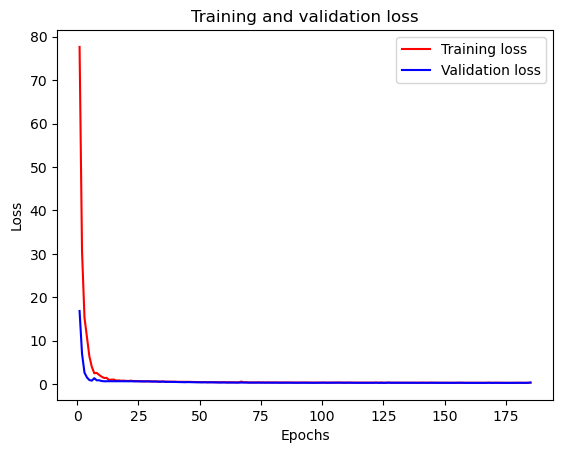

In [323]:
#loss for training and validation sets from training history
loss = history.history['loss']
val_loss = history.history['val_loss']

#X range
epochs = range(1, len(acc) + 1)

#plot training loss, 'r' for red line
plt.plot(epochs, loss, 'r', label='Training loss')

#plot validation loss, 'b'for blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

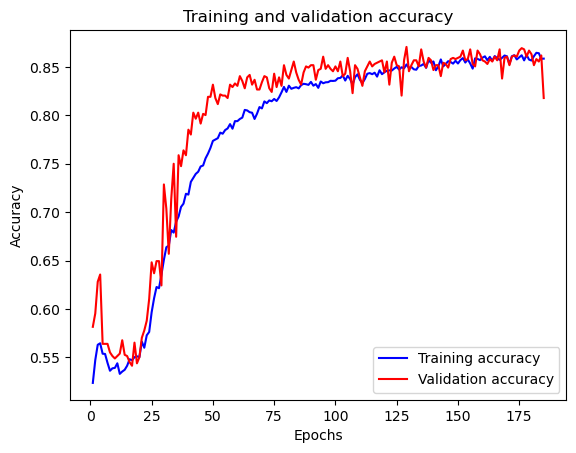

In [324]:
#accuracy for training and validation sets from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#X range
epochs = range(1, len(loss_values) + 1)

#plot training accuracy, 'b' for blue line
plt.plot(epochs, acc, 'b', label='Training accuracy')

#plot validation accuracy, 'r'for red line
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [325]:
#highest validation accuracy
np.max(val_acc)

0.8706030249595642

In [310]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [311]:
model.predict(X)

249/249 [==============================] - 0s 1ms/step


array([[9.9841267e-01],
       [9.9637330e-01],
       [9.9052656e-01],
       ...,
       [9.1531223e-01],
       [9.1045594e-04],
       [6.6519076e-01]], dtype=float32)

In [312]:
np.round(model.predict(X),0)

249/249 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [313]:
y

0       1
1       1
2       1
3       1
4       1
       ..
8028    1
8029    0
8030    0
8031    0
8032    0
Name: Poverty_recode, Length: 7956, dtype: int64

In [314]:
preds = np.round(model.predict(X),0)

#confusion matrix
confusion_matrix(y, preds)

249/249 [==============================] - 0s 1ms/step


array([[3941,  379],
       [ 623, 3013]])

In [315]:
#classification report
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4320
           1       0.89      0.83      0.86      3636

    accuracy                           0.87      7956
   macro avg       0.88      0.87      0.87      7956
weighted avg       0.87      0.87      0.87      7956



The model started with a low accuracy. The model started to improve at around the 20th epoch. The model did learn from the data but not gently.

The validation accuracy peaked at 0.87. It plateaued at this point. 

The loss values fluctuate at the start and then stabalize as the training progresses. 

# Baseline Model
## Question 10

In [326]:
from sklearn.linear_model import LogisticRegression

#initialize LR model
LR = LogisticRegression(max_iter=100000000)

#fit to training data
clf = LR.fit(X_train, y_train)

In [327]:
preds = clf.predict(X)

#confusion matrix
print(confusion_matrix(y, preds))

[[3896  424]
 [ 654 2982]]


In [328]:
#classification report
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4320
           1       0.88      0.82      0.85      3636

    accuracy                           0.86      7956
   macro avg       0.87      0.86      0.86      7956
weighted avg       0.87      0.86      0.86      7956



The NN model did better than the baseline LR model. The NN model had slightly higher numbers in all error metrics. The NN model had more true positives and true negatives and less false negatives and false poistives. 